The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
74
Delta:  1.0
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  1.3
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  1.6
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  1.9
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  2.2
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  2.5
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  2.8
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  3.1
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  3.4
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  3.6999999999999997
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.0
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.3
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.6
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  4.9
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  5.2
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  5.5
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  5.8
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  6.1
Run:  0
Run:  25
Run:  50
Run:  75
Delta:  6.3999999999999995
Run:  0
Run:  25
Run:

Text(0.5, 0, '$\\delta=n/p$')

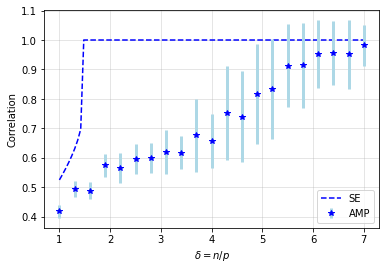

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 14:56:53 2023

@author: pp423
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from ipynb.fs.full.amp_qgt import sub_amp_bayes, create_beta, Yspatial_to_Ytilde, Xspatial_to_Xtilde, CreateSpatialCouplingX, DefectCalc
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub
from numpy.random import binomial


theta = 0.8
#number of subjects
p = 520
# defective chance
noise = 0
Gamma = 40
WrcTrue = False
w = 6
run_no = 100
ITL = int(2*(1-theta)/theta*p**theta)
print(ITL)
delta = 2

delta_array = np.linspace(1, 7, num=21)

se_delta_array = np.linspace(1, 7, num=101)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for delta in delta_array:
    #defective chance
    nu = p**(theta-1)
    print("Delta: ", delta)
    #number of tests
    n = int(ITL*delta)
    
    mse_runs = []
    nc_runs = []
    
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
    
        t = 100
        #chance of inclusion in a test
        alpha = 0.5
        if(run % 25 ==0):
            print("Run: ", run)
            
        X = CreateSpatialCouplingX(Gamma, w, n, p, alpha, WrcTrue)
        y = np.dot(X, beta_0)
        
        #AMP
        X_tilde = Xspatial_to_Xtilde(X, Gamma, w, n, p, alpha, WrcTrue)
        
        defect_no = DefectCalc(beta_0, Gamma, p)
        
        y_tilde = Yspatial_to_Ytilde(y, Gamma, w, n, p, alpha, WrcTrue, defect_no)
        X_tilde_T = np.transpose(X_tilde)
        beta, mse_pred, tau_array, error_norm_array, nc_array = sub_amp_bayes(X_tilde, X_tilde_T, y_tilde, t, nu, beta_0, theta, delta)
        norm_correl = (np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2
        
        nc_runs.append(norm_correl)
        
    nc_array_av.append(np.average(nc_runs))
    nc_array_std.append(np.std(nc_runs))
    
for delta in se_delta_array:    
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(delta, t, nu, p,  theta)
    se_nc_array.append(nc_pred)
    
    
plt.figure()
plt.plot(se_delta_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(delta_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel(r'$\delta=n/p$')

